Link: https://colab.research.google.com/drive/1BQxy7GYbWmzwxAJdjcPMCF73qgid0dTi?usp=sharing

# Implementation of ANN

### Loading moudles

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

### Load MNIST handwritten digit data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


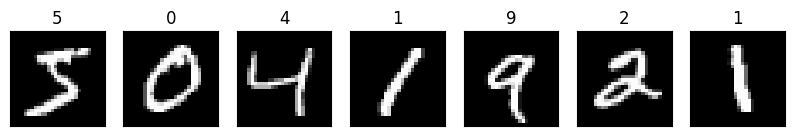

In [ ]:
fig, axes = plt.subplots(ncols=7, sharex=False,
sharey=True, figsize=(10, 5))
for i in range(7):
  axes[i].set_title(y_train[i])
  axes[i].imshow(X_train[i], cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()

In [ ]:
to_categorical(3, num_classes=10)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Convert $y_{train}$ into one-hot format

In [ ]:
temp = []
for i in range(len(y_train)):
  temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)

### Convert $y_{test}$ into one-hot format

In [ ]:
temp = []
for i in range(len(y_test)):
  temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


### Create simple Neural Network model

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

### Acuracy test

In [ ]:
model.fit(X_train, y_train, epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4479 - acc: 0.8907 - val_loss: 0.0973 - val_acc: 0.9162
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0645 - acc: 0.9299 - val_loss: 0.0532 - val_acc: 0.9314
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0427 - acc: 0.9432 - val_loss: 0.0428 - val_acc: 0.9443
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0367 - acc: 0.9505 - val_loss: 0.0384 - val_acc: 0.9514
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0334 - acc: 0.9556 - val_loss: 0.0359 - val_acc: 0.9547


### Here we see that the model is 95% accurate

In [ ]:
predictions = model.predict(X_test)
print(predictions)

313/313 [==============================] - 0s 1ms/step
[[2.8985962e-33 3.6267196e-18 7.3874153e-13 ... 1.0000000e+00
  3.3067474e-22 3.5812844e-17]
 [7.5152755e-09 7.1457613e-08 9.9999928e-01 ... 1.1445993e-08
  6.5868710e-10 3.8552869e-21]
 [5.4259759e-20 1.0000000e+00 2.0675728e-08 ... 1.7154370e-10
  4.2266600e-11 6.7438949e-12]
 ...
 [5.5779639e-20 1.6475565e-17 8.1777416e-18 ... 2.3699603e-11
  2.8174788e-16 6.2776026e-12]
 [6.6248413e-24 5.8808618e-27 0.0000000e+00 ... 4.8605239e-30
  8.8550396e-18 4.7020235e-22]
 [1.5221815e-20 5.5424415e-33 2.9350970e-22 ... 0.0000000e+00
  2.5401315e-24 1.3256007e-27]]


### Prediction class number

In [ ]:
predictions = np.argmax(predictions, axis=1)
print(predictions)

[7 2 1 ... 4 5 6]


### Classification immage show

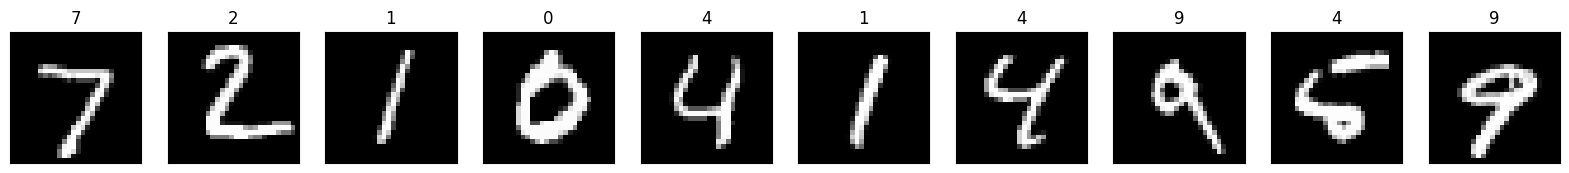

In [ ]:
fig, axes = plt.subplots(ncols=10, sharex=False,sharey=True, figsize=(20, 4))
for i in range(10):
  axes[i].set_title(predictions[i])
  axes[i].imshow(X_test[i], cmap='gray')
  axes[i].get_xaxis().set_visible(False)
  axes[i].get_yaxis().set_visible(False)
plt.show()